In [8]:
import pandas as pd
import numpy as np
import ast

In [9]:
data = pd.read_csv('data/games.csv')

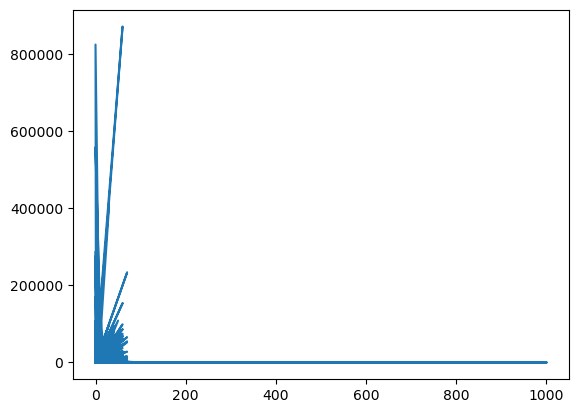

In [10]:
#test
import matplotlib.pyplot as plt

column_data = data['Price']
column_data2 = data['Peak CCU']

plt.plot(column_data, column_data2)


## Data Cleaning & Processing

In [11]:
dropped = data.drop(columns=['About the game', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Average playtime two weeks', 'Median playtime two weeks', 'Screenshots', 'Movies'])

dropped.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,['English'],[],...,11,30,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,5,12,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,8,17,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."


### Splitting array in columns

In [12]:
#unique_values(df, column, pre)
#   unique_values will split a column containing an array into multiple columns in the dataframe.
#
#   params: df:     Dataframe
#           column: The column name you want to split.
#           pre:    The prefix to be added to the new column.
#   return: Set()
def unique_values(df, column, pre):
     uniques = set()

     for values in df[column]:
          now_its_an_array = values.split(",")
          
          for i in now_its_an_array:
               val = i.split("'")
               if (len(val) == 3):
                    val_true = val[1]
                    ot = f"{pre}_{val_true}"
                    uniques.add(ot)

     return uniques

#make_columns(df, name)
#   make_columns will add to the given dataframe a column  with the given name  .
#
#   params: df:     Dataframe
#           name: The column name you want to add.
#   return: Dataframe
def make_columns(df, names):
     for name in names:
          df[name] = 0
     
     return df
     

#explode_column(df, column, pre)
#   explode_columns will split column and create a new one with a unique name
#
#   params: df:     Dataframe
#           column: The column name you want to split.
#           pre:    The prefix to be added to the new column.
#   return: Dataframe
def explode_column(df, column, pre):
     uniques = unique_values(df, column, pre)
     
     output = make_columns(df, uniques)

     return output

exploded = explode_column(dropped, "Supported languages", "Supported")

exploded.head()

C:\Users\Supercraft\AppData\Local\Temp\ipykernel_5208\1194400787.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = 0
C:\Users\Supercraft\AppData\Local\Temp\ipykernel_5208\1194400787.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name] = 0
C:\Users\Supercraft\AppData\Local\Temp\ipykernel_5208\1194400787.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Supported_Kinyarwanda,Supported_Tswana,Supported_Assamese,Supported_ Korean,Supported_French,Supported_Russian\r\nEnglish\r\nSpanish - Spain\r\nFrench\r\nJapanese\r\nCzech,Supported_Amharic,Supported_Tatar,Supported_Romanian,Supported_English Dutch English
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,['English'],[],...,0,0,0,0,0,0,0,0,0,0
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,0,0,0,0,0
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,0,0,0,0,0
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,0,0,0,0,0
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,0,0,0,0,0


In [13]:
#save as csv
exploded.to_csv('data/games_exploded.csv', index=False)